In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import datetime
import calendar
import warnings
import pandas.util.testing as tm
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas.util.testing as tm
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifierCV
from sklearn.metrics import f1_score, accuracy_score

# First Part

In [37]:
from google.colab import files
upload = files.upload()

Saving Fraud_Data.csv to Fraud_Data (1).csv


In [0]:
fraud_data_one = pd.read_csv("Fraud_Data.csv")

In [39]:
#First view of fraud_data without country
fraud_data_one.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [40]:
#Resume about all the dataset
fraud_data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [41]:
#Checking if there is some nan values
fraud_data_one.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [42]:
#Resume about the main information 
fraud_data_one.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [43]:
#Delete some columns
data = fraud_data_one.drop(["signup_time", "purchase_time", "device_id", "source","sex", "browser","ip_address"], axis = 1)
data.head()

,user_id,purchase_value,age,class
0,22058,34,39,0
1,333320,16,53,0
2,1359,15,53,1
3,150084,44,41,0
4,221365,39,45,0


## Train first Algorithm model with simple preprocessing

In [0]:
data = pd.get_dummies(data)

In [0]:
#Divide the dataset in two
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [0]:
#Divide the dataset into  training & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [0]:
#appling an ensemble learning
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [SVC(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]

In [48]:
#Train the models
for model in models:
  model.fit(X_train_scaled, y_train)
  print(model.score(X_test_scaled, y_test))


0.9071681931282757
0.9071681931282757
0.837392132987453
0.8800095293557096


#Second Part

In [51]:
from google.colab import files
upload = files.upload()

In [0]:
#fraud_data = pd.read_csv("Fraud_Data.csv")
#ipaddress_data = pd.read_csv("IpAddress_to_Country.csv")

In [0]:
fraud_data = pd.read_csv("fraud_data_w_country.csv")

In [0]:
#We want to get country related to each IP address

#ipaddress_data.upper_bound_ip_address.astype("float")
#ipaddress_data.lower_bound_ip_address.astype("float")
#fraud_data.ip_address.astype("float")

# function that takes an IP address as argument and returns country associated based on IP_table

#def IP_to_country(ip) :
    #try :
        #return ipaddress_data.country[(ipaddress_data.lower_bound_ip_address < ip)                            
                                #& 
                                #(ipaddress_data.upper_bound_ip_address > ip)].iloc[0]
    #except IndexError :
        #return "Unknown"     
    
# To affect a country to each IP :
#fraud_data["IP_country"] = fraud_data.ip_address.apply(IP_to_country)


In [0]:
#fraud_data.to_csv('fraud_data_w_country.csv', index=False)

## Data visualizing

In [115]:
#First view at the top tables
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [116]:
#Counting the number of fraudulent and non fraudulent transaction
fraud_count= fraud_data["class"].value_counts()
fraud_count_percent = fraud_data["class"].value_counts(normalize=True)
print(fraud_count)
print(fraud_count_percent)

0    136961
1     14151
Name: class, dtype: int64
0    0.906354
1    0.093646
Name: class, dtype: float64


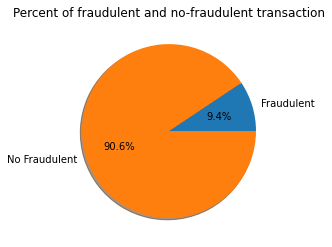

In [117]:
# Pie chart
labels = 'Fraudulent', 'No Fraudulent'
sizes = [14151, 136961]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.title("Percent of fraudulent and no-fraudulent transaction")
plt.show()

On constate que: 

*   90.6% of transaction are non fraudulent
*   9.4% of the transaction on the website are fraudulent

In [118]:
# Is there any user who appear more than once?
user_apparition = fraud_data.duplicated(subset="user_id", keep =False).sum()
print("There is {} person with the same user id".format(user_apparition))

There is 0 person with the same user id


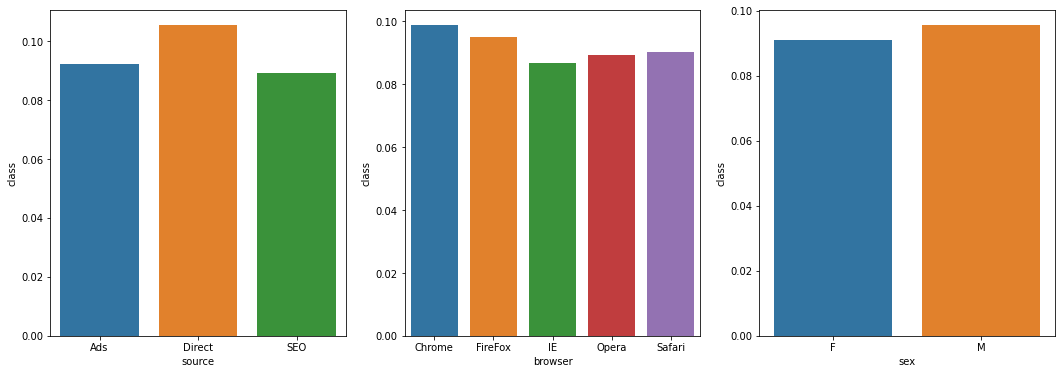

In [59]:
#Some barplot graph
f, ax = plt.subplots(1,3, figsize =(18,6))
sns.barplot(fraud_data.groupby(by = "source").mean()["class"].index, fraud_data.groupby(by = "source").mean()["class"], ax=ax[0])
sns.barplot(fraud_data.groupby(by = "browser").mean()["class"].index, fraud_data.groupby(by = "browser").mean()["class"], ax =ax[1])
sns.barplot(fraud_data.groupby(by = "sex").mean()["class"].index, fraud_data.groupby(by = "sex").mean()["class"], ax = ax[2])

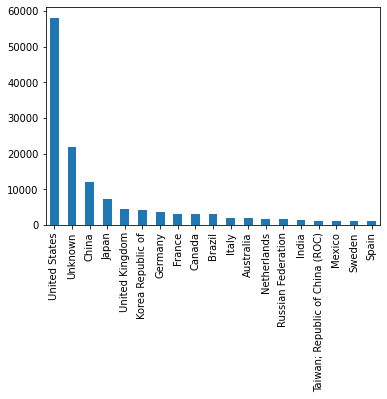

In [60]:
#Overview of distribution by country of origin
fraud_data.IP_country.value_counts()[fraud_data.IP_country.value_counts() >1000].plot(kind="bar")


We notice that there's a bunch of unknow countries, does it means that the system wasn't able to track the device use during the transaction, because the user hide is IP-Address? Probably because he planned to o commit a fraudulent transaction.

## **Data Preprocessing**

In [0]:
# Looking for a duplicate devise use
device_dupli = pd.DataFrame(fraud_data.groupby(by = "device_id").device_id.count()) 
device_dupli.rename(columns={"device_id": "freq_device"}, inplace=True)           
device_dupli.reset_index(level=0, inplace= True)
dupli = device_dupli[device_dupli.freq_device >1]                               
dupli = device_dupli[device_dupli.freq_device >2]

In [0]:
# We include the new column on the main dataset
fraud_data = fraud_data.merge(device_dupli, on= "device_id")

In [163]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'IP_country', 'freq_device'],
      dtype='object')

In [136]:
# Most use device
dupli.sort_values(by="freq_device", ascending=False)

,device_id,freq_device
24607,EQYVNEGOFLAWK,20
136873,ZUSVMDEZRBDTX,20
14100,CQTUVBYIWWWBC,20
69916,NGQCKIADMZORL,20
54521,KIPFSCNUGOLDP,20
...,...,...
16556,DDBISKRNVSVMX,3
58096,KZYECBRGTWQDJ,3
95324,RZBIPRDYWHRFF,3
95625,SANQZCPGRCERN,3


In [168]:
fraud_data.freq_device.unique()

array([ 1, 12,  8,  2, 11,  6, 20, 13, 17, 14,  9, 10, 18, 16, 15,  7,  5,
        4, 19,  3])

The most used device where been used 20 times

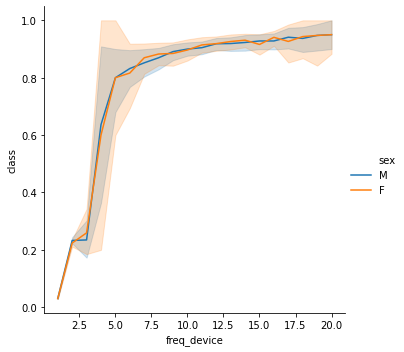

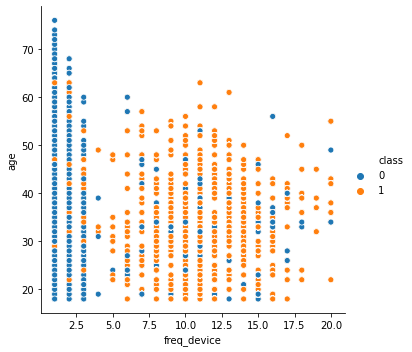

In [169]:
# distribution between frequence use of device and class
sns.relplot(x="freq_device", y="class", data=fraud_data, kind="line",hue="sex")
# distribution freq_device & age
sns.relplot(x="freq_device", y="age", data=fraud_data, kind="scatter",hue="class")

This graph clearly show us that most of the time when a devise been use more than 5 times there's a fraudulent transaction at the end.
So we can conclue that the most a device as been use the most are the risk of a fraudulent transaction to happend is high.

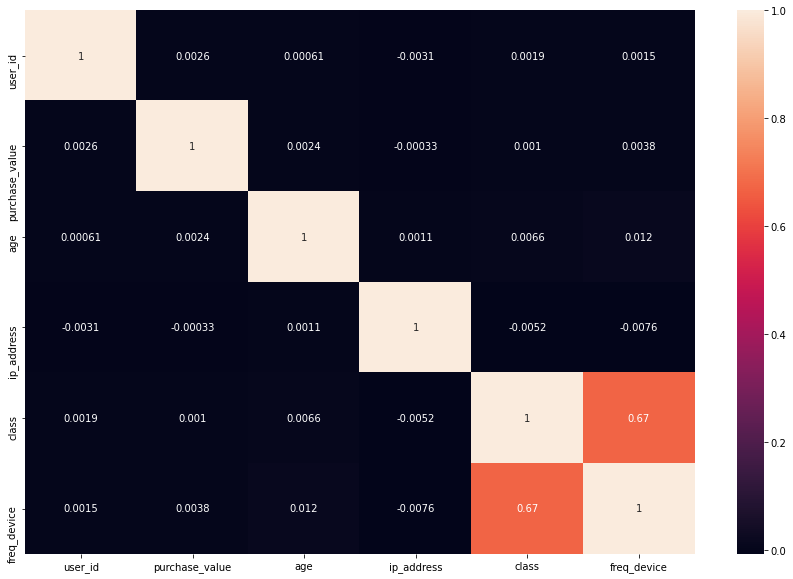

In [170]:
corr = fraud_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

We notice the corelation between the feature frequence device and the target class

In [0]:
#categorisation of the column freq_device in 7 diferent categories

#fraud_data.freq_device = fraud_data.freq_device.apply(lambda x :
                                                #str(x) if x <5 else
                                                #"5-10" if x>=5 and x<=10 else
                                                #"11-15" if x>10 and x<=15 else
                                                #"> 15")

In [172]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country,freq_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12


In [0]:
from datetime import datetime, time
# We convert signup_time and purchase_time en datetime
fraud_data.signup_time = fraud_data.signup_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
fraud_data.purchase_time = fraud_data.purchase_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())


## **Train  Algorithm models after high preprocessing**

In [174]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'IP_country', 'freq_device'],
      dtype='object')

In [0]:
#Selecting the columns to keep
fraud_data = fraud_data.loc[:, ['signup_time', 'purchase_time',
      'source', 'browser', 'sex','freq_device', 'age',"purchase_value",'class']]
      #I drop  the following columns :"ip_address","user_id", "IP_country", "device_id"

In [0]:
#fraud_data = fraud_data.drop(["user_id", "signup_time", "purchase_time"], axis = 1)

In [146]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   signup_time     151112 non-null  object
 1   purchase_time   151112 non-null  object
 2   source          151112 non-null  object
 3   browser         151112 non-null  object
 4   sex             151112 non-null  object
 5   freq_device     151112 non-null  object
 6   age             151112 non-null  int64 
 7   purchase_value  151112 non-null  int64 
 8   class           151112 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 11.5+ MB


In [176]:
#All the columns we keep
fraud_data.columns

Index(['signup_time', 'purchase_time', 'source', 'browser', 'sex',
       'freq_device', 'age', 'purchase_value', 'class'],
      dtype='object')

In [0]:
#Select the features & target values
features_list = ['signup_time', 'purchase_time', 'source', 'browser', 'sex',
       'freq_device', 'age', 'purchase_value']
numeric_indices = [6,7]
categorical_indices = [0,1,2,3,4,5]
target_variable = 'class'

In [178]:
#Divide the data on features variables and target
X = fraud_data.loc[:, features_list]
Y = fraud_data.loc[:, target_variable]
print('Variables explicatives : ', X.columns)

Variables explicatives :  Index(['signup_time', 'purchase_time', 'source', 'browser', 'sex',
       'freq_device', 'age', 'purchase_value'],
      dtype='object')


In [179]:
# Divide dataset Train set & Test set 
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [180]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[datetime.date(2015, 7, 29) datetime.date(2015, 9, 1) 'SEO' 'Safari' 'F'
  1 37 25]
 [datetime.date(2015, 3, 3) datetime.date(2015, 3, 20) 'SEO' 'IE' 'M' 1
  18 20]
 [datetime.date(2015, 7, 26) datetime.date(2015, 10, 8) 'SEO' 'IE' 'F' 1
  46 9]
 [datetime.date(2015, 5, 15) datetime.date(2015, 8, 4) 'SEO' 'Chrome' 'F'
  1 28 29]
 [datetime.date(2015, 5, 3) datetime.date(2015, 8, 6) 'SEO' 'Chrome' 'M'
  1 30 34]]
[[datetime.date(2015, 2, 22) datetime.date(2015, 4, 22) 'SEO' 'Safari'
  'F' 1 43 48]
 [datetime.date(2015, 3, 25) datetime.date(2015, 5, 3) 'SEO' 'FireFox'
  'M' 1 21 42]]

[0 0 0 0 0]
[0 0]


In [181]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")


# Normalization
numeric_transformer = StandardScaler()
    
# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')
featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]    )

X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)

print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
  (0, 208)	1.0
  (0, 471)	1.0
  (0, 579)	1.0
  (0, 583)	1.0
  (0, 604)	0.44583040778437516
  (0, 605)	-0.6526446844049392
  (1, 60)	1.0
  (1, 306)	1.0
  (1, 579)	1.0
  (1, 581)	1.0
  (1, 584)	1.0
  (1, 604)	-1.7588748299183543
  (1, 605)	-0.9252259715985044
  (2, 205)	1.0
  (2, 508)	1.0
  (2, 579)	1.0
  (2, 581)	1.0
  (2, 604)	1.490164467748826
  (2, 605)	-1.524904803424348
  (3, 133)	1.0
  (3, 443)	1.0
  (3, 579)	1.0
  (3, 604)	-0.5985036521800756
  (3, 605)	-0.434579654650087
  (4, 121)	1.0
  (4, 445)	1.0
  (4, 579)	1.0
  (4, 584)	1.0
  (4, 604)	-0.3664294166324199
  (4, 605)	-0.16199836745652182


In [0]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Model

In [183]:
#LogisticRegressionCV
model_logiR = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time model_logiR.fit(X_train_scaled, Y_train)
Y_test_pred = model_logiR.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(Y_test, Y_test_pred))
print('f1_score : ', f1_score(Y_test, Y_test_pred))

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

CPU times: user 376 ms, sys: 104 ms, total: 480 ms
Wall time: 1min 7s
accuracy_score :  0.9352810773252159
f1_score :  0.6219559335137225
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27393
           1       0.69      0.57      0.62      2830

    accuracy                           0.94     30223
   macro avg       0.82      0.77      0.79     30223
weighted avg       0.93      0.94      0.93     30223



### Decision Tree model


In [184]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion='entropy')
%time model_tree.fit(X_train_scaled, Y_train)
Y_test_pred = model_tree.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(Y_test, Y_test_pred))
print('f1_score : ', f1_score(Y_test, Y_test_pred))

# Print the classification report 
print(classification_report(Y_test, Y_test_pred))

CPU times: user 12.6 s, sys: 4.79 ms, total: 12.6 s
Wall time: 12.7 s
accuracy_score :  0.9284650762664196
f1_score :  0.5997778600518325
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     27393
           1       0.63      0.57      0.60      2830

    accuracy                           0.93     30223
   macro avg       0.79      0.77      0.78     30223
weighted avg       0.93      0.93      0.93     30223



### Random Forest Classifier

In [185]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier(random_state=5, n_estimators=20)
%time model_random.fit(X_train_scaled, Y_train)
Y_test_pred = model_random.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(Y_test, Y_test_pred))
print('f1_score : ', f1_score(Y_test, Y_test_pred))

# Print the classification report 
print(classification_report(Y_test, Y_test_pred))

CPU times: user 27.6 s, sys: 27.1 ms, total: 27.6 s
Wall time: 27.7 s
accuracy_score :  0.9517255070641565
f1_score :  0.671174216813162
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.93      0.53      0.67      2830

    accuracy                           0.95     30223
   macro avg       0.94      0.76      0.82     30223
weighted avg       0.95      0.95      0.95     30223



# Third part

## Upgrade your Models performance

### **Boosting**

In [0]:
X = fraud_data.loc[:,fraud_data.columns != 'class']
y = fraud_data.loc[:,fraud_data.columns == 'class']

In [0]:
X= pd.get_dummies(X, drop_first=True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
#Adaboost Model
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.linear_model import LinearRegression
model_ada = AdaBoostRegressor()
%time model_ada.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 28s, sys: 25.3 ms, total: 1min 28s
Wall time: 1min 28s


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [192]:
from sklearn.metrics import accuracy_score, f1_score
print('accuracy_score', accuracy_score(Y_test, Y_test_pred))
print('f1_score', f1_score(Y_test, Y_test_pred))

accuracy_score 0.9517255070641565
f1_score 0.671174216813162
